In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os        # Used for iterating through directories and join paths
import cv2       # Image operations

DATADIRECTORY = "D:/Summer2019/kagglecatsanddogs_3367a/PetImages"

CATEGORIES = ["Dog","Cat"]

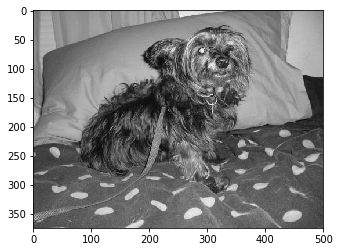

In [2]:
for i in CATEGORIES:
    path = os.path.join(DATADIRECTORY,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)          #This reduce the images to grayscale
        plt.imshow(img_array,cmap="gray")          
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(375, 500)


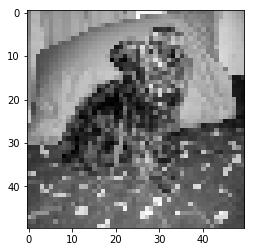

In [4]:
#Now we need to normalize all the images to get standardized set of images

IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray") 
plt.show()

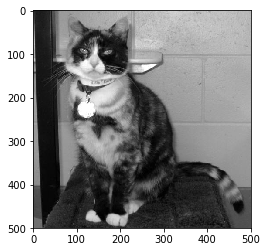

In [5]:
training_data = []

def create_training_data():
    for i in CATEGORIES:
        path = os.path.join(DATADIRECTORY,i)
        class_num = CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)   #This reduce the images to grayscale
                plt.imshow(img_array,cmap="gray")         
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()


In [6]:
print(len(training_data))

24946


In [7]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
1
1
1
1
0


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [19]:
model = Sequential()   # FeedForward model

X = X/255.0

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X,y,batch_size=32,epochs=5,validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/5
22451/22451 [==============================] - 142s 6ms/step - loss: 0.6937 - acc: 0.5002 - val_loss: 0.6937 - val_acc: 0.4882
Epoch 2/5
22451/22451 [==============================] - 146s 6ms/step - loss: 0.6933 - acc: 0.5014 - val_loss: 0.6929 - val_acc: 0.5118
Epoch 3/5
22451/22451 [==============================] - 134s 6ms/step - loss: 0.6933 - acc: 0.5009 - val_loss: 0.6929 - val_acc: 0.5118
Epoch 4/5
22451/22451 [==============================] - 125s 6ms/step - loss: 0.6933 - acc: 0.4978 - val_loss: 0.6935 - val_acc: 0.4882
Epoch 5/5
22451/22451 [==============================] - 132s 6ms/step - loss: 0.6932 - acc: 0.4955 - val_loss: 0.6933 - val_acc: 0.4882
